#ЛР №6

Основные понятия ООП. Инкапсуляция. Классы. Декораторы.

##Основная задача "Эксперимент"

Нужно написать класс "Эксперимент", который производит работу с данными.

Вы получили данные в виде словаря. Словарь имеет следующую структуру {'date': '2023-01-05', 'signal': 'path_to_ecg_signal', 'parameters':{}}

**Интерфейс**

Нужно написать класс, где должны поддерживаться следующие методы:

* _конструктор_ — принимает словарь и создает соответствующие поля (self.data, self.path_signal, self.parameters)
* `get_datе()` — возвращает дату записи сигнала.
* `get_signal_length()` — возвращает длину сигнала.
* `plot_signal()` — выводит график сигнала.
* `_signal_filtration(signal, filtration_parametres)` — производит фильтрацию сигнала.
* `_signal_find_peaks(signal, find_peaks_parametres)` — находит точки максимума сигнала и возвращает их в виде списка.
* `_calculate_RR_intervals()` — производит расчет длительности RR интервалов и возвращает длины RR интервалов в виде списка.
В этом методе вызываются методы _signal_filtration и _signal_find_peak.
* `get_RR_statistics()` — возвращает статистические характеристики RR интервалов на записи ECG - среднее, std, min, max (в виде словаря).
В этом методе вызывается метод _calculate_RR_intervals.


*можно добавить свои методы

In [1]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import wfdb
import heartpy as hp
from scipy.signal import find_peaks

class Experiment:

    def __init__(self,dictionary):
        self.date = dictionary['date']
        self.path_signal = dictionary['signal']
        self.parameters = dictionary['parameters']

    # @classmethod
    def get_date(self):
        return self.date
    
    def get_signal(self):
        return pd.read_csv(self.path_signal)
    
    def get_signal_length(self):
        df = self.get_signal()
        return len(df)
    
    def plot_signal(self):
        df = self.get_signal()
        plt.plot(df['MLII'])
        plt.show()

    def _signal_filtration(self):
        df = self.get_signal()
        params = self.parameters['filter']
        filtered = hp.filter_signal(df['MLII'], **params)
        return filtered
    
    def _signal_find_peaks(self):
        filtered = self._signal_filtration()
        params = self.parameters['peaks']
        peaks, _ = find_peaks(filtered, **params)
        return peaks
    
    def _calculate_RR_intervals(self):
        peaks = self._signal_find_peaks()
        RR_intervals = np.diff(peaks)
        return RR_intervals
    
    def get_RR_statistics(self):
        RR_intervals = self._calculate_RR_intervals()
        return {'min':np.min(RR_intervals),'max':np.max(RR_intervals),'mean':np.mean(RR_intervals),'std':np.std(RR_intervals)}
    
    def plot_filtered_signal(self):
        filtered = self._signal_filtration()
        plt.plot(filtered)
        plt.show()

    def plot_peaks(self):
        filtered = self._signal_filtration()
        peaks = self._signal_find_peaks()
        plt.plot(filtered)
        plt.plot(peaks, filtered[peaks],label= "ecg")
        plt.legend()
        plt.show()

In [2]:
parameters = {
    'filter':
    {'cutoff' : [0.75, 3.5], 'sample_rate' : 100, 'order' : 3, 'filtertype' : 'bandpass'},
    'peaks':
    {'height' : 20}
}

In [3]:
ex = Experiment({'date': '2023-01-05', 'signal': 'ecg.csv', 'parameters':parameters})

In [4]:
ex.get_date()

'2023-01-05'

In [5]:
ex.get_signal_length()

20000

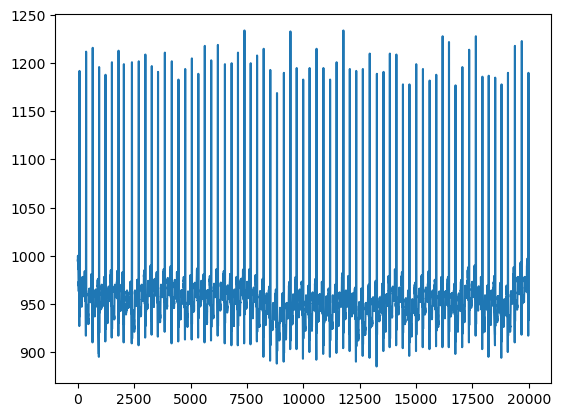

In [6]:
ex.plot_signal()

In [7]:
ex._signal_filtration()

array([ 2.93669972,  3.29570765,  3.67201131, ..., 46.85395203,
       40.8126148 , 34.54963788])

In [8]:
ex._signal_find_peaks()

array([   77,   370,   663,   947,  1231,  1515,  1809,  2045,  2403,
        2706,  2998,  3283,  3560,  3863,  4171,  4466,  4765,  5060,
        5347,  5634,  5918,  6214,  6527,  6824,  7106,  7391,  7670,
        7953,  8246,  8539,  8837,  9141,  9431,  9710,  9998, 10282,
       10591, 10894, 11192, 11480, 11781, 12066, 12350, 12645, 12950,
       13267, 13562, 13842, 14131, 14423, 14711, 15011, 15310, 15607,
       15900, 16183, 16465, 16755, 17058, 17358, 17657, 17947, 18227,
       18514, 18796, 19081, 19388, 19693, 19926, 19992], dtype=int64)

In [9]:
ex._calculate_RR_intervals()

array([293, 293, 284, 284, 284, 294, 236, 358, 303, 292, 285, 277, 303,
       308, 295, 299, 295, 287, 287, 284, 296, 313, 297, 282, 285, 279,
       283, 293, 293, 298, 304, 290, 279, 288, 284, 309, 303, 298, 288,
       301, 285, 284, 295, 305, 317, 295, 280, 289, 292, 288, 300, 299,
       297, 293, 283, 282, 290, 303, 300, 299, 290, 280, 287, 282, 285,
       307, 305, 233,  66], dtype=int64)

In [10]:
ex.get_RR_statistics()

{'min': 66, 'max': 358, 'mean': 288.6231884057971, 'std': 31.077323597890175}

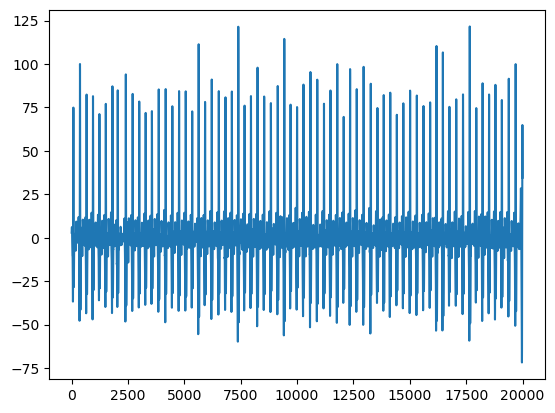

In [11]:
ex.plot_filtered_signal()

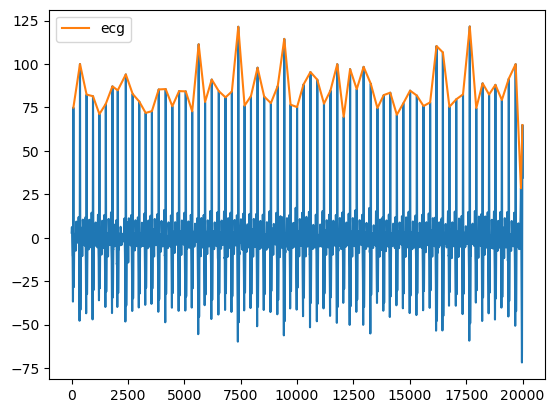

In [12]:
ex.plot_peaks()

##Задача ** "Минигольф"

 в папке на githab